In [269]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import backend as K
#from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from matplotlib import colors

In [38]:
data_path = Path('./kaggle_input/')
training_path = data_path / 'training'      # 400 X-train ('train'), y-train('test') input-output pairs
evaluation_path = data_path / 'evaluation'  # 400
test_path = data_path / 'test'              # 100 pairs X-train ('train') (input-output),
                                            #           y-train (input only) pairs

training_tasks_files = sorted(os.listdir(training_path))#[1:]
eval_tasks_files = sorted(os.listdir(evaluation_path))
test_task_files = sorted(os.listdir(test_path))

In [117]:
training_tasks_files

['007bbfb7.json',
 '00d62c1b.json',
 '017c7c7b.json',
 '025d127b.json',
 '045e512c.json',
 '0520fde7.json',
 '05269061.json',
 '05f2a901.json',
 '06df4c85.json',
 '08ed6ac7.json',
 '09629e4f.json',
 '0962bcdd.json',
 '0a938d79.json',
 '0b148d64.json',
 '0ca9ddb6.json',
 '0d3d703e.json',
 '0dfd9992.json',
 '0e206a2e.json',
 '10fcaaa3.json',
 '11852cab.json',
 '1190e5a7.json',
 '137eaa0f.json',
 '150deff5.json',
 '178fcbfb.json',
 '1a07d186.json',
 '1b2d62fb.json',
 '1b60fb0c.json',
 '1bfc4729.json',
 '1c786137.json',
 '1caeab9d.json',
 '1cf80156.json',
 '1e0a9b12.json',
 '1e32b0e9.json',
 '1f0c79e5.json',
 '1f642eb9.json',
 '1f85a75f.json',
 '1f876c06.json',
 '1fad071e.json',
 '2013d3e2.json',
 '2204b7a8.json',
 '22168020.json',
 '22233c11.json',
 '2281f1f4.json',
 '228f6490.json',
 '22eb0ac0.json',
 '234bbc79.json',
 '23581191.json',
 '239be575.json',
 '23b5c85d.json',
 '253bf280.json',
 '25d487eb.json',
 '25d8a9c8.json',
 '25ff71a9.json',
 '264363fd.json',
 '272f95fa.json',
 '27a28665

In [39]:
def load_files(path):
    path_files = sorted(os.listdir(path))
    tasks = []
    for task_file in path_files:
        with open(str(path / task_file), 'r') as f:
            task = json.load(f)
            tasks.append(task)
    return tasks

In [40]:
training_tasks = load_files(training_path)
test_tasks = load_files(test_path)
evaluation_tasks = load_files(evaluation_path)

In [149]:
train_tasks[0]#['test'][0]

{'test': [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]],
   'output': [[7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 7, 0, 0, 0, 0, 7, 7, 0],
    [7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 0, 7, 0, 0, 0, 7, 0, 7],
    [7, 7, 0, 0, 0, 0, 7, 7, 0],
    [7, 0, 7, 7, 0, 7, 0, 0, 0],
    [7, 0, 7, 7, 0, 7, 0, 0, 0],
    [7, 7, 0, 7, 7, 0, 0, 0, 0]]}],
 'train': [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]],
   'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [7, 7, 7, 7, 7, 7, 7, 7, 7],
    [0, 7, 7, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7],
    [0, 0, 0, 7, 7, 7, 7, 7, 7],
    [0, 0, 0, 0, 7, 7, 0, 7, 7]]},
  {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]],
   'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 4, 0, 0, 0, 0, 0, 4, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 4

### plotting a few examples

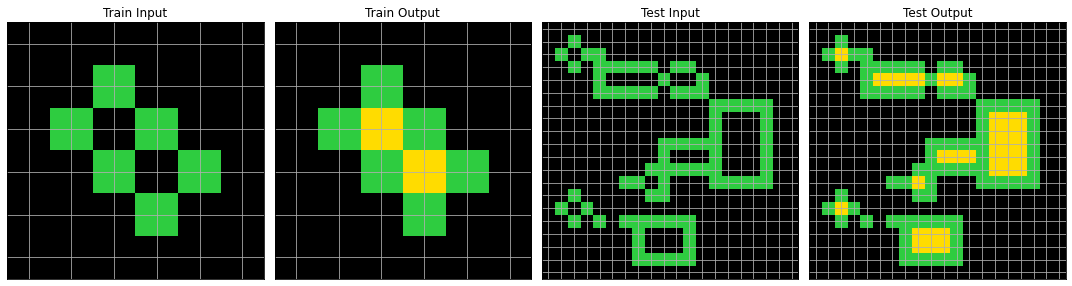

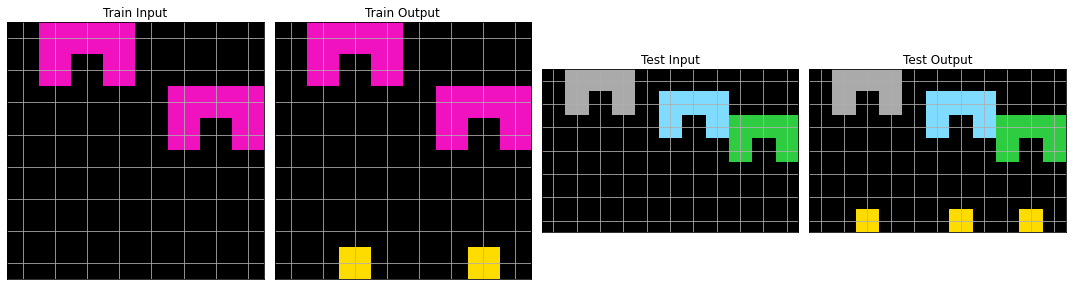

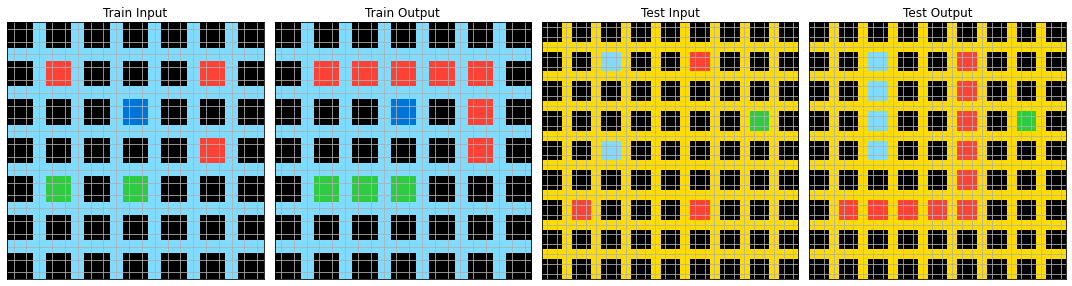

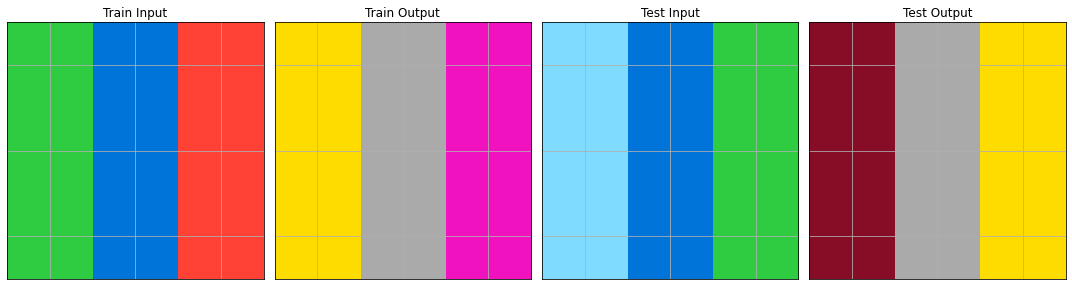

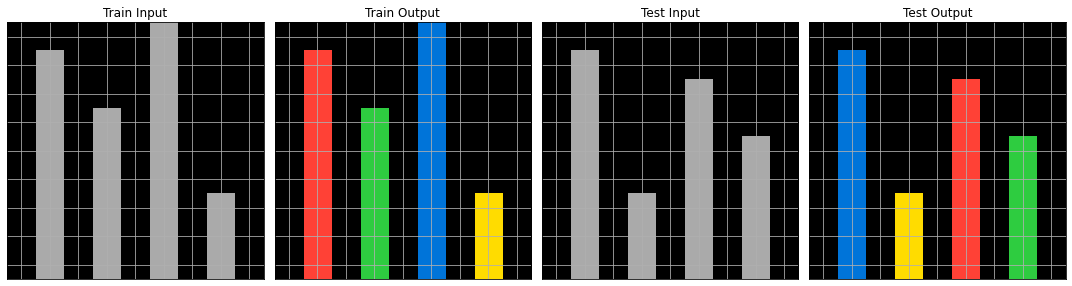

In [310]:
for i in [1, 125, 8, 15, 9]:

    task_file = str(training_path / training_tasks_files[i])

    with open(task_file, 'r') as f:
        task = json.load(f)

    def plot_task(task):
        """
        Plots the first train and test pairs of a specified task,
        using same color scheme as the ARC app
        """
        cmap = colors.ListedColormap(
            ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
             '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
        norm = colors.Normalize(vmin=0, vmax=9)
        fig, ax = plt.subplots(1, 4, figsize=(15,15))
        
        ax[0].imshow(task['train'][0]['input'], cmap=cmap, norm=norm)
        width = np.shape(task['train'][0]['input'])[1]
        height = np.shape(task['train'][0]['input'])[0]
        ax[0].set_xticks(np.arange(0,width))
        ax[0].set_yticks(np.arange(0,height))
        ax[0].set_xticklabels([])
        ax[0].set_yticklabels([])
        ax[0].tick_params(length=0)
        ax[0].grid(True)
        ax[0].set_title('Train Input')
        
        
        ax[1].imshow(task['train'][0]['output'], cmap=cmap, norm=norm)
        width = np.shape(task['train'][0]['output'])[1]
        height = np.shape(task['train'][0]['output'])[0]
        ax[1].set_xticks(np.arange(0,width))
        ax[1].set_yticks(np.arange(0,height))
        ax[1].set_xticklabels([])
        ax[1].set_yticklabels([])
        ax[1].tick_params(length=0)
        ax[1].grid(True)
        ax[1].set_title('Train Output')
        ax[2].imshow(task['test'][0]['input'], cmap=cmap, norm=norm)
        width = np.shape(task['test'][0]['input'])[1]
        height = np.shape(task['test'][0]['input'])[0]
        ax[2].set_xticks(np.arange(0,width))
        ax[2].set_yticks(np.arange(0,height))
        ax[2].set_xticklabels([])
        ax[2].set_yticklabels([])
        ax[2].tick_params(length=0)
        ax[2].grid(True)
        ax[2].set_title('Test Input')
        ax[3].imshow(task['test'][0]['output'], cmap=cmap, norm=norm)
        width = np.shape(task['test'][0]['output'])[1]
        height = np.shape(task['test'][0]['output'])[0]
        ax[3].set_xticks(np.arange(0,width))
        ax[3].set_yticks(np.arange(0,height))
        ax[3].set_xticklabels([])
        ax[3].set_yticklabels([])
        ax[3].tick_params(length=0)
        ax[3].grid(True)
        ax[3].set_title('Test Output')
        plt.tight_layout()
        plt.show()

    plot_task(task)

 
 ---
 ---

### 1. Create Train - Test - Split

In [44]:
Xs_test, ys_test, Xs_train, ys_train = [], [], [], []

for task in train_tasks:
    X_test, y_test, X_train, y_train = [], [], [], []

    for pair in task["test"]:
        X_test.append(pair["input"])
        y_test.append(pair["output"])      ### to be predicted !!!

    for pair in task["train"]:
        X_train.append(pair["input"])
        y_train.append(pair["output"])
    
    Xs_test.append(X_test)
    ys_test.append(y_test)
    Xs_train.append(X_train)
    ys_train.append(y_train)

In [45]:
len(Xs_train), len(ys_train), len(Xs_test), len(ys_test)

(400, 400, 400, 400)

In [298]:
### put this in a fct later
# cv2.resize(np.asarray(train_data['input']), dsize=(32, 32), interpolation=cv2.INTER_NEAREST))



li=[]
for X_train in Xs_train:
    for e in X_train:
        e = np.array(e)
        e = np.pad(e, [(0, 30-e.shape[0]), (0, 30-e.shape[1])], mode='constant')
        li.append(e)
X_train_big = np.array(li)
X_train_big = X_train_big /10.
X_train_big = X_train_big.reshape(1301,30,30, 1)  #(x_train.shape + (1,) )

In [299]:
X_train_big.shape

(1301, 30, 30, 1)

In [302]:
### second approach for each task --> fix up later

tasks = []
for X_train in Xs_train:
    li2=[]
    for e in X_train:
        e = np.array(e)
        e = np.pad(e, [(0, 30-e.shape[0]), (0, 30-e.shape[1])], mode='constant')
        li2.append(e)
    li2 = np.array(li2)
    tasks.append(li2)

In [303]:
len(tasks)

400

In [306]:
tasks[0].shape

(5, 30, 30)

In [309]:
np.array(tasks).shape

/opt/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(400,)

In [293]:
np.array(tasks)[0].shape

/opt/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


(5, 30, 30)

# ---------------------------------------------------------------------------------------------


In [271]:
Xs_train[:10]

[[[[0, 7, 7], [7, 7, 7], [0, 7, 7]],
  [[4, 0, 4], [0, 0, 0], [0, 4, 0]],
  [[0, 0, 0], [0, 0, 2], [2, 0, 2]],
  [[6, 6, 0], [6, 0, 0], [0, 6, 6]],
  [[2, 2, 2], [0, 0, 0], [0, 2, 2]]],
 [[[0, 0, 0, 0, 0, 0],
   [0, 0, 3, 0, 0, 0],
   [0, 3, 0, 3, 0, 0],
   [0, 0, 3, 0, 3, 0],
   [0, 0, 0, 3, 0, 0],
   [0, 0, 0, 0, 0, 0]],
  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 3, 0, 3, 0, 0, 0, 0, 0],
   [0, 0, 0, 3, 0, 3, 0, 0, 0, 0],
   [0, 0, 3, 0, 0, 0, 3, 0, 0, 0],
   [0, 0, 0, 0, 0, 3, 0, 3, 0, 0],
   [0, 0, 0, 3, 0, 3, 3, 0, 0, 0],
   [0, 0, 3, 3, 3, 0, 0, 0, 0, 0],
   [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
  [[0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
   [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
   [0, 3, 3, 0, 3, 3, 0, 3, 0, 0],
   [3, 0, 0, 3, 0, 0, 3, 0, 3, 0],
   [0, 0, 0, 3, 0, 0, 3, 3, 0, 0],
   [0, 0, 0, 3, 0, 0, 3, 0, 0, 0],
   [0, 0, 0, 3, 0, 0, 3, 0, 0, 0],
   [0, 0, 0, 0, 3, 3, 0, 3, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
   [0, 0,

In [217]:
xx = np.array([np.array(xi) for xi in Xs_train[1]], dtype=object)

In [222]:
xx[0]#.shape

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 3, 0, 3, 0, 0],
       [0, 0, 3, 0, 3, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [226]:
np.pad(xx[0],2)#.shape

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [228]:
Xs_train[125]

[[[0, 6, 6, 6, 0, 0, 0, 0],
  [0, 6, 0, 6, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 6, 6, 6],
  [0, 0, 0, 0, 0, 6, 0, 6],
  [0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 3, 3, 3, 0],
  [0, 3, 0, 3, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0],
  [0, 8, 8, 8, 0, 0, 0],
  [0, 8, 0, 8, 6, 6, 6],
  [0, 0, 0, 0, 6, 0, 6],
  [0, 0, 0, 0, 0, 0, 0]]]

In [261]:
dd = np.array([np.array(xi) for xi in Xs_train[125]], dtype=object)

In [262]:
dd[0].shape, dd[1].shape, dd[2].shape

((8, 8), (5, 5), (5, 7))

In [267]:
np.pad(dd[1], [(0, 3), (0, 3)], mode='constant').shape

(8, 8)

In [268]:
np.pad(dd[2], [(0, 3), (0, 1)], mode='constant')#.shape

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 8, 8, 8, 0, 0, 0, 0],
       [0, 8, 0, 8, 6, 6, 6, 0],
       [0, 0, 0, 0, 6, 0, 6, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

---
---